## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Load our new dataset

In [2]:
#Loading the data
df = pd.read_csv('CleanPA.csv')
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,LivingStatus,Age,TotalSpent,Children,FamilySize,Parents
0,Graduated,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,Single,64,1617,0,1,0
1,Graduated,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,Single,67,27,2,3,1
2,Graduated,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,Partner,56,776,0,2,0
3,Graduated,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,Partner,37,53,1,3,1
4,Postgrad,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,Partner,40,422,1,3,1


## Data Exploration
Let's take a look at the processed data.

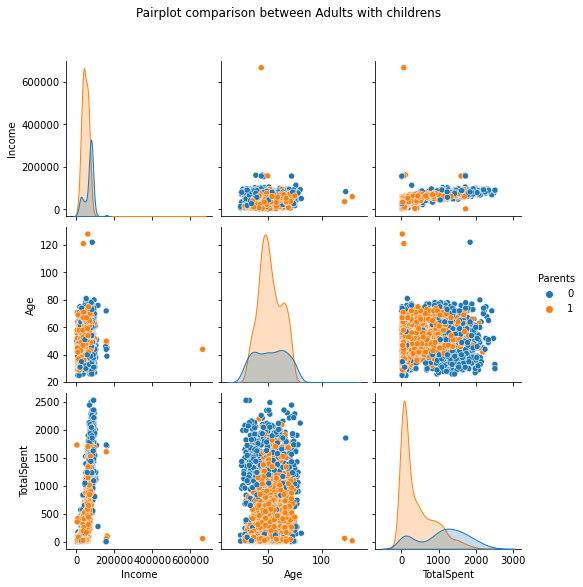

In [3]:
lst= ['Income','Age', 'Parents', 'TotalSpent','Education']
pl = sns.pairplot(df[lst], hue = 'Parents')
pl.fig.suptitle('Pairplot comparison between Adults with childrens', y = 1.08)
plt.show()

We can see that we have a few outliers that are skewing the data.

## Boxplots
Here we are using a box plot to help us determine where the outliers are at.Clearly we can see a few people who have great health and have lived passed 120. Lets drop them in this scenario. Then we can see a few people are well off then others and we will do the same thing.

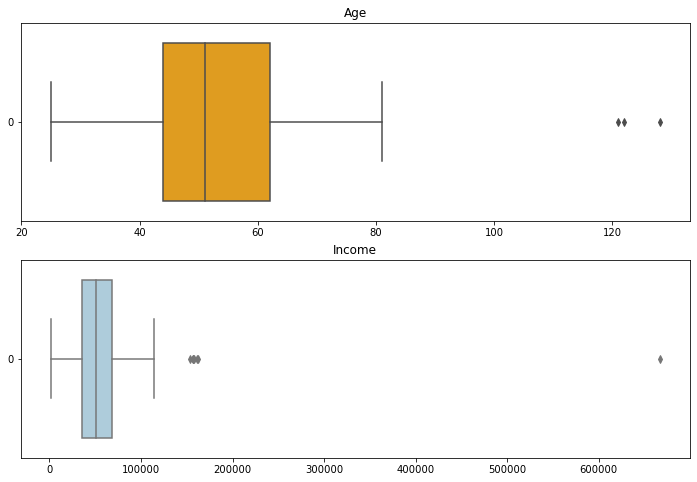

In [4]:
fig, axes = plt.subplots(2,1,figsize=(12,8))

sns.boxplot(ax = axes[0],data = df['Age'], orient = 'h', palette= ['orange', 'muted'])
axes[0].title.set_text('Age')
sns.boxplot(ax = axes[1],data = df['Income'], orient = 'h', palette= 'Paired')
axes[1].title.set_text('Income')

In [5]:
#Since we can see out outliers we know we can remove them out.
df = df[(df['Age'] < 85)]
df = df[(df["Income"]<130000)]

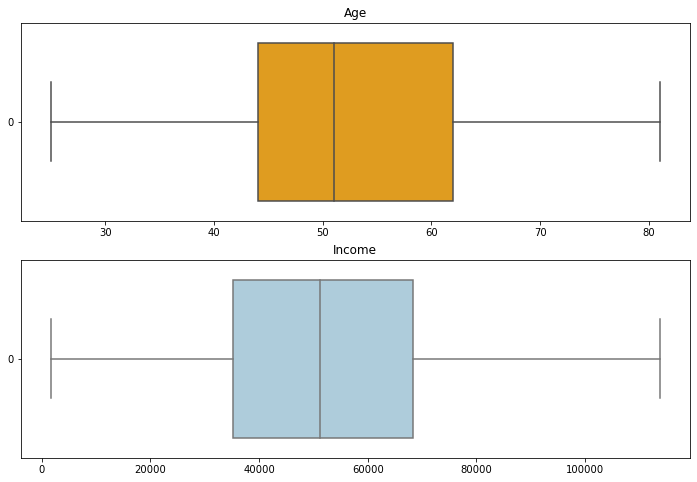

In [6]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
sns.boxplot(ax = axes[0],data = df['Age'], orient = 'h', palette= ['orange', 'muted'])
axes[0].title.set_text('Age')
sns.boxplot(ax = axes[1],data = df['Income'], orient = 'h', palette= 'Paired')
axes[1].title.set_text('Income')

Here we can see we got rid of the outliers. Now lets see if there any correlation between these features.

## Heatmap

Text(0.5, 1.03, 'Correlation between features')

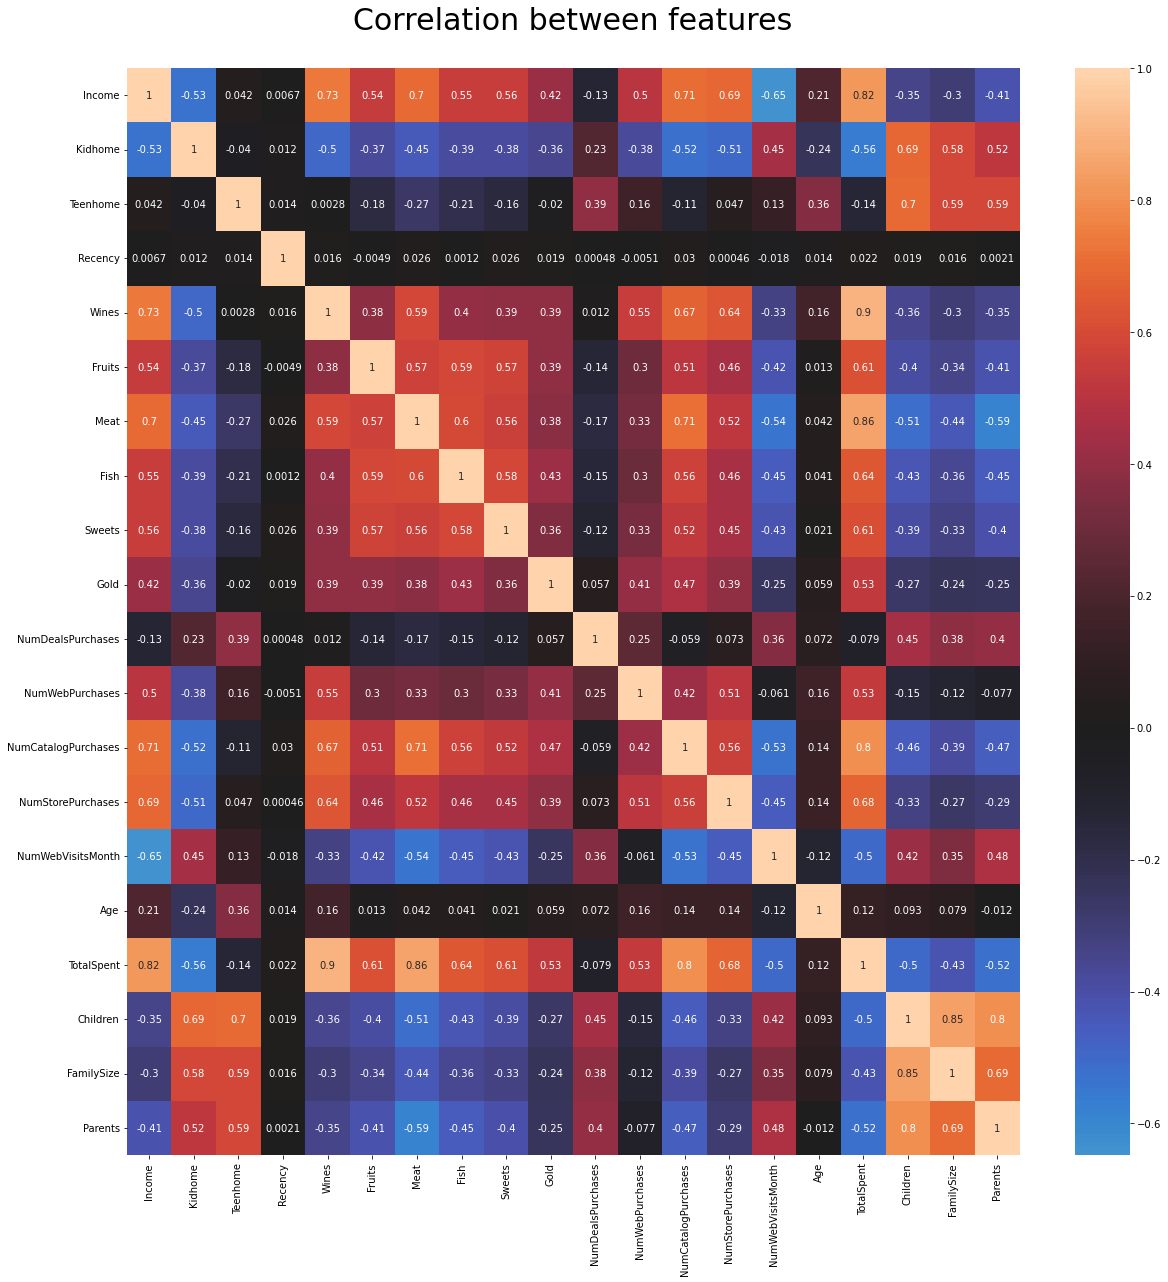

In [7]:
#Lets look at the correlation between the data
cor = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot= True, center= 0)
plt.title("Correlation between features", fontsize =30, y = 1.03)

We can see that there is no abnormal correlations in this data.

## Scaling the data
Next we are going to scale the data but in order to do that we will need to transform our labels to numerical data.

In [8]:
#Processing the data
obj = (df.dtypes == 'object')
lst = list(obj[obj].index)
print('Categorical in the data:', lst)

Categorical in the data: ['Education', 'LivingStatus']


In [9]:
#Transform the object dtypes.
LE = LabelEncoder()
for i in lst:
    df[i]=df[[i]].apply(LE.fit_transform)

In [10]:
#Scaling the data.
scaler = StandardScaler()
scaler.fit(df)
dfScaled = pd.DataFrame(scaler.transform(df),columns= df.columns )
dfScaled

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,LivingStatus,Age,TotalSpent,Children,FamilySize,Parents
0,-0.892338,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,...,1.424772,2.628526,-0.562650,0.689203,1.347625,1.017189,1.679323,-1.266589,-1.759012,-1.58466
1,-0.892338,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,...,-1.132957,-0.588043,-1.179732,-0.139645,1.347625,1.273530,-0.963897,1.403420,0.448513,0.63105
2,-0.892338,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,...,1.424772,-0.230646,1.288596,-0.554069,-0.742046,0.333612,0.281242,-1.266589,-0.655250,-1.58466
3,-0.892338,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,...,-0.767567,-0.945440,-0.562650,0.274779,-0.742046,-1.289883,-0.920675,0.068415,0.448513,0.63105
4,0.571654,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,...,0.328602,0.126750,0.054432,-0.139645,-0.742046,-1.033542,-0.307248,0.068415,0.448513,0.63105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,-0.892338,0.463624,-0.823405,0.906602,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,...,1.790162,0.126750,-0.562650,-0.139645,-0.742046,0.162718,1.220500,0.068415,0.448513,0.63105
2201,0.571654,0.598401,2.900920,0.906602,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,...,1.424772,-0.230646,-0.254109,0.689203,-0.742046,1.957107,-0.270675,2.738424,2.656038,0.63105
2202,-0.892338,0.258780,-0.823405,-0.930767,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,...,-0.767567,0.126750,2.214218,0.274779,1.347625,-1.033542,1.054260,-1.266589,-1.759012,-1.58466
2203,0.571654,0.851004,-0.823405,0.906602,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,...,0.693992,0.841543,1.288596,-0.968493,-0.742046,1.102636,0.392623,0.068415,0.448513,0.63105


### Principal Component Analysis
Since we have so many factors in the data frame. It makes it harder to work with. When using PCA we are able to reduce the dimension of the data frame  making it more interpretable and minimize the information loss.

In [11]:
#PCA - Principal Component Analysis - Helps us increase interpretability while minimizing information loss.
pca = PCA(n_components = .95) #We can set our eigen at 95 or 99% depends on our situation
pca.fit(dfScaled)
pcaDF = pd.DataFrame(pca.transform(dfScaled))
pcaDF.columns = ["Col"+str(i) for i in range(1, 16)]
pcaDF.describe().T
#Here we can see at 95% we have 15 eigen values.


,count,mean,std,min,25%,50%,75%,max
Col1,2205.0,-2.126795e-16,2.901676,-6.020464,-2.575461,-0.785748,2.421799,7.477675
Col2,2205.0,8.378282e-17,1.705683,-4.304349,-1.338764,-0.155976,1.248140,6.133599
Col3,2205.0,-1.933450e-17,1.152565,-3.016449,-0.903314,-0.117354,0.805289,3.960279
Col4,2205.0,3.947460e-17,1.118684,-3.142721,-0.783229,0.038149,0.730076,5.458270
Col5,2205.0,1.288966e-17,1.040637,-2.683932,-0.735621,-0.001364,0.708396,3.230464
Col6,2205.0,-6.444832e-18,0.995641,-2.576491,-0.812648,0.005812,0.786748,2.599963
Col7,2205.0,-4.833624e-18,0.964937,-3.403829,-0.691767,-0.026864,0.593716,3.476050
Col8,2205.0,4.189141e-17,0.892114,-3.465207,-0.512110,-0.050434,0.457856,3.740571
Col9,2205.0,-5.719788e-17,0.818398,-3.405800,-0.525762,-0.008660,0.495287,5.494355
Col10,2205.0,3.222416e-17,0.787967,-3.886786,-0.315630,0.034078,0.394356,4.470232


With our 15 eigen values we will use only 3 of them to project the data in the reduced dimension.

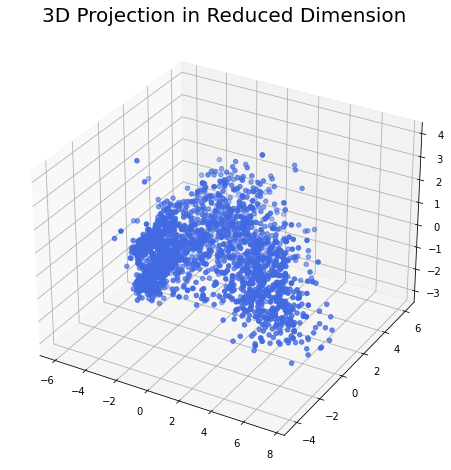

In [12]:
#A 3D Projection Of Data In The Reduced Dimension
x = pcaDF["Col1"]
y = pcaDF["Col2"]
z = pcaDF["Col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="royalblue", marker="o" )
ax.set_title('3D Projection in Reduced Dimension', fontsize = 20)
plt.show()

### Clustering
With yellowbrick it helps determine where our elbow (k) will be at and the distortion score. This method is know as the agglomerative clustering. What it does is merge examples to our desired k amount. Here we decided to choose 15 because our eigen value given earlier from our PCA.

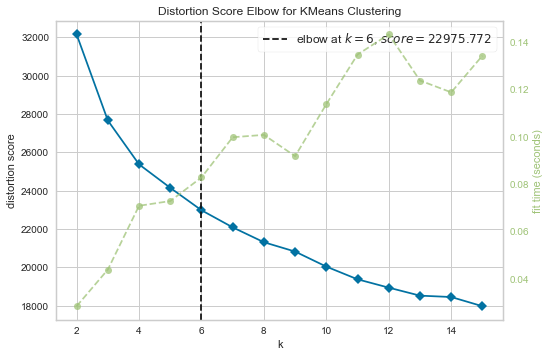

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#KMeans -Yellowbrick Elbow Method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow = KElbowVisualizer(KMeans(), k=15)
elbow.fit(pcaDF)
elbow.show()
#We can see from yellowbrick that our elbow is at 6.

Here we are using our 2nd Kmean method which is a MinMaxScaler and visualy estimating where our elbow is at.

In [14]:
#KMeans Using MinMaxScaler and Matplot
mms = MinMaxScaler()
mms.fit(df)
transformDF =mms.transform(df)
s2d = [] #Sum of Squared Distance
K = range(1,15)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(transformDF)
    s2d.append(km.inertia_)

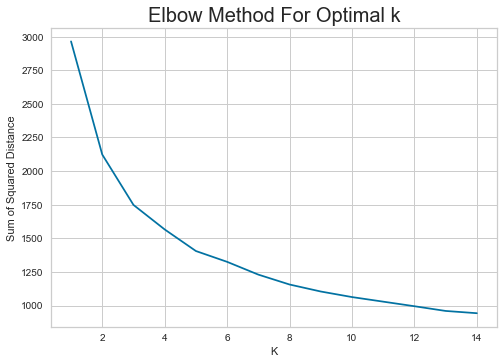

In [15]:
#Searching for the Elbow
plt.plot(K, s2d, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method For Optimal k', fontsize=20)
plt.show()
#From here we can see the elbow is around k = 5 or 6

## 3D Plot
We are using the 3D plot from earlier to see how these clusters are related to one another. We can see from this angle are closely group close to one another.

In [16]:
#Agglomerative Clusting Model
from sklearn.cluster import AgglomerativeClustering
AggC = AgglomerativeClustering(n_clusters = 6)
yhat = AggC.fit_predict(pcaDF)
df['Clusters'] = yhat

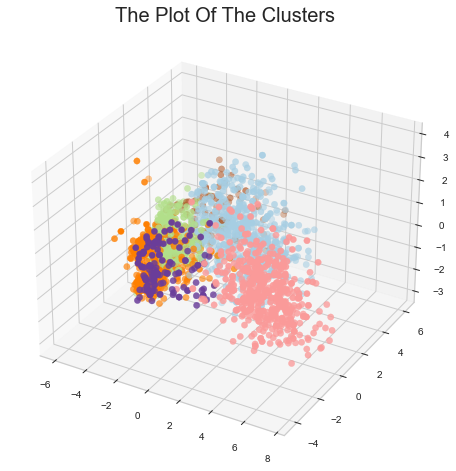

In [17]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=df["Clusters"], marker='o', cmap = 'Paired' )
ax.set_title("The Plot Of The Clusters", fontsize=20)
plt.show()

## Count Plot
Now lets take a look at the distribution among the clusters. We can see that cluster 4 and 5 have a lower count  compared to 0-3.

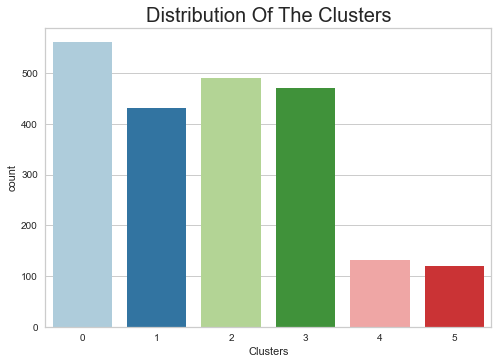

In [18]:
pl = sns.countplot(x = df["Clusters"], palette= 'Paired')
pl.set_title("Distribution Of The Clusters", fontsize =20)
plt.show()

## Scatter Plot
When we plot the income and total spent between the 6 clusters we can see that group 2 has a higher income and spents more. While group 1 are around the 40k-60k income range spending less then $500. With group 4 we can see that they are lower income and less spending and group 5 is more disperse.

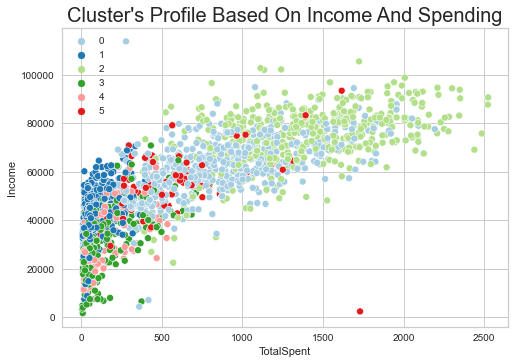

In [19]:
pl = sns.scatterplot(data = df, x = df['TotalSpent'], y = df['Income'], hue= df['Clusters'], palette= 'Paired')
pl.set_title("Cluster's Profile Based On Income And Spending", fontsize =20)
plt.legend()
plt.show()

## Swarm Plot
Using Swamplot and box plot we can see that cluster 2 has a larger range of total spending but group tightly around the 1000 - 2000 range. Same for cluster 0, but at a lower total spending range. With all the other clusters we can see there total spending are a lot lower then the cluster 0 and 2.

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\JupyterLab\resources\jlab_server\lib\site-packages\seabor

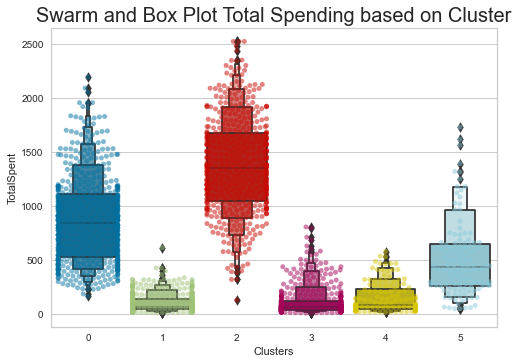

In [20]:
plt.figure()
pl=sns.swarmplot(x = df["Clusters"], y = df["TotalSpent"],  alpha=0.5 )
pl=sns.boxenplot(x = df["Clusters"], y = df["TotalSpent"])
pl.set_title("Swarm and Box Plot Total Spending based on Cluster", fontsize =20)
plt.show()

## Joint Plot
For our last plot we are using a joint plot to get an understand of how the personal category affects the total spending in the family.

<Figure size 576x396 with 0 Axes>

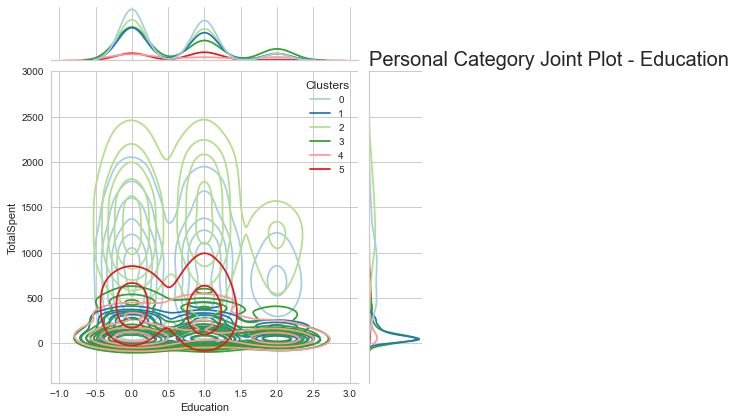

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

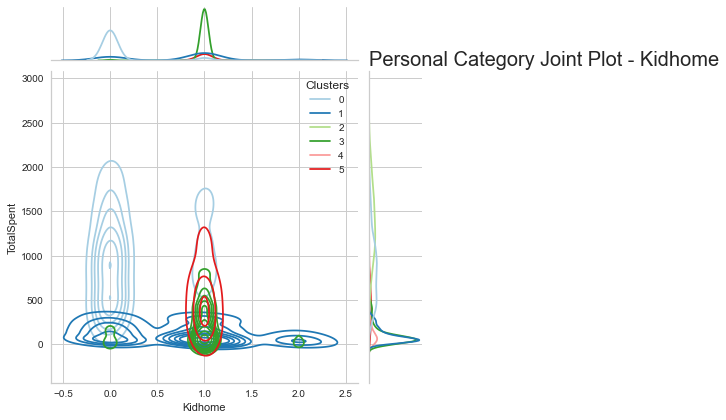

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

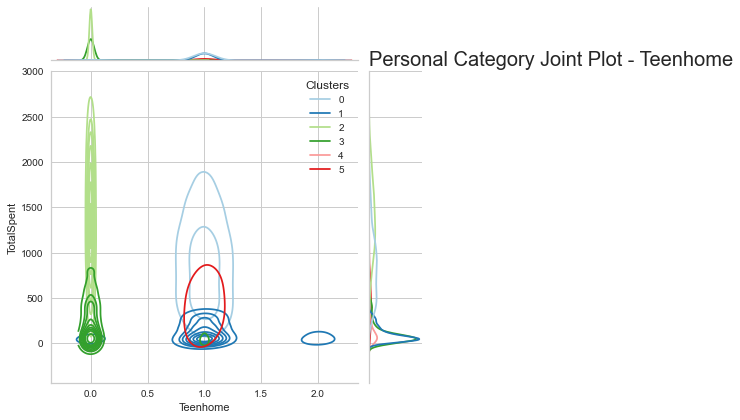

<Figure size 576x396 with 0 Axes>

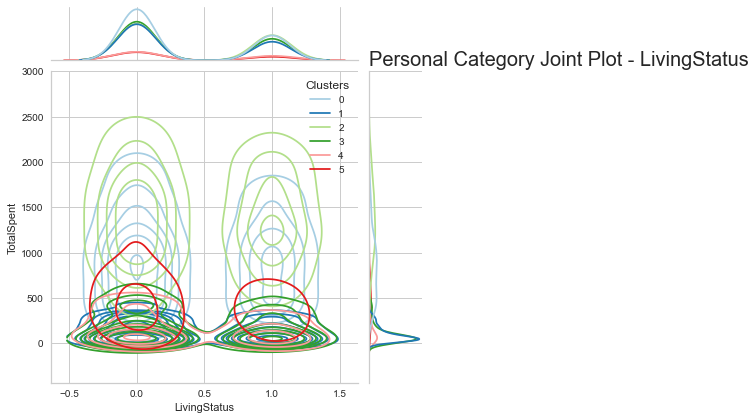

<Figure size 576x396 with 0 Axes>

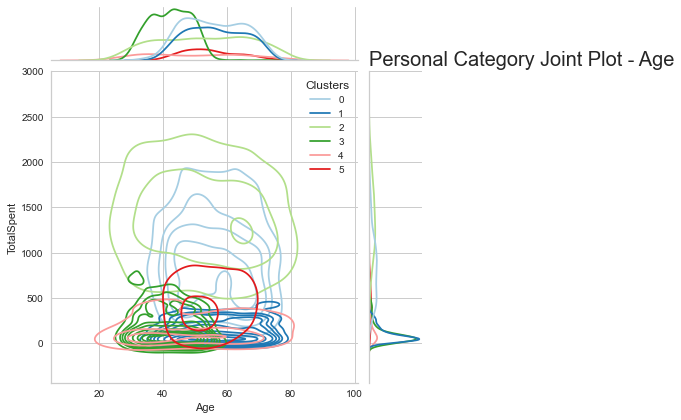

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

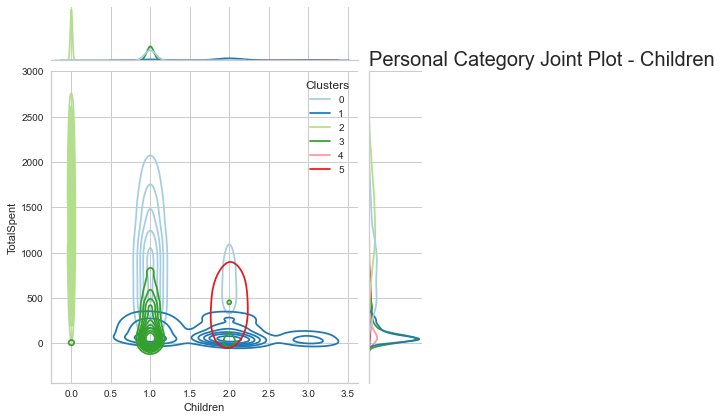

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

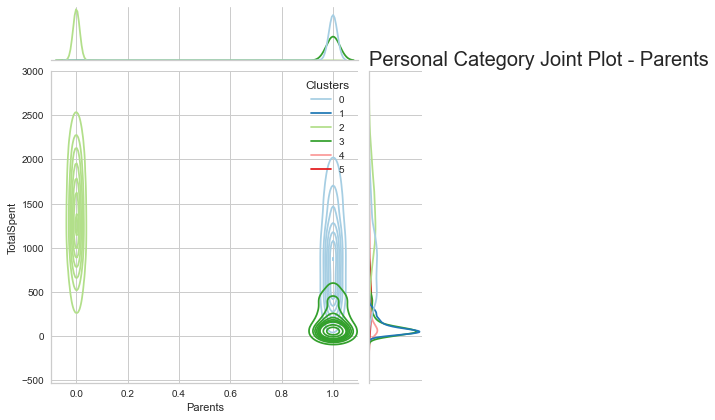

In [ ]:
Personal = ['Education', 'Kidhome', 'Teenhome', 'LivingStatus', 'Age', 'Children','Parents', 'FamilySize']

for i in Personal:
    plt.figure()
    sns.jointplot(x = df[i], y = df["TotalSpent"], hue = df["Clusters"], kind="kde", palette= 'Paired')
    plt.title('Personal Category Joint Plot - '+ i, loc = 'left', fontsize = 20
             )
    plt.show()

## What can we deduct from this?
### Figure 1
In figure 1 we can see that education doesn’t matter for the total spending for cluster 2. While for cluster 0,1,3, and 4 their total spending is lower. We can also see that cluster 5 that education does matter in their total spending range.
### Figure 2
In figure 2 we can see that cluster 0 has no kids and their spending are a lot higher than the other clusters. With all the other clusters we can see the parents do have kids and their spending is condensed closely with one another.
### Figure 3
In figure 3 we can see similar spending habits with parents with kids  from the previous plot. But this time it’s with teenagers. We can also see that Cluster 1 has more teenagers than any other clusters.
### Figure 4
In figure 4 we can categorize these into Single or Partners.  For each cluster we can see that they are like one another and that being parent no matter their status doesn’t affect their total spending.
### Figure 5
In figure 5, we want to focus on the distribution above and notice how cluster 3 are in a lower age group compared to cluster 0 or 1.  We can also see that cluster 3 has a tight spread in the spending range .
### Figure 6
In figure 6, we can see a trend where the more kids the parents have the lower the spending and also most clusters beside cluster 0 will have 1-2 children in the family.
### Figure 7
This one is the obvious, cluster 0 don’t have children in the family and has a larger spending pool then the other clusters.
### Figure 8
In figure 8, we can see that if the reflection of the family size and on how big it gets it will lower the total spending. With family size of 1,2,3 we can see that they are spending more then family that are larger then 3.
